___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7


#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](attachment:./www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import dtreeviz

In [2]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

<Axes: xlabel='fico', ylabel='Count'>

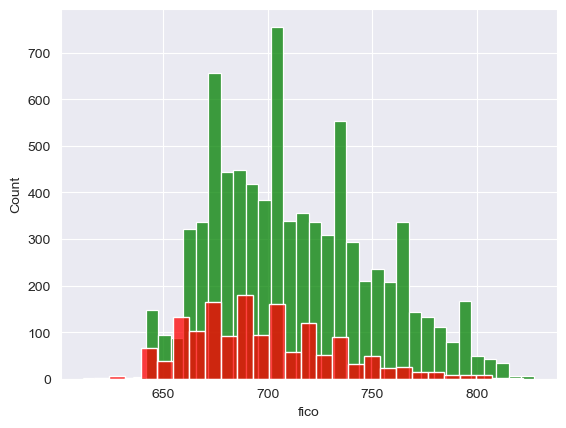

In [5]:
sns.histplot(data=df[df['not.fully.paid'] == 0], x='fico', color='green', label='not.fully.paid = 0')
sns.histplot(data=df[df['not.fully.paid'] == 1], x='fico', color='red', label='not.fully.paid = 1')

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

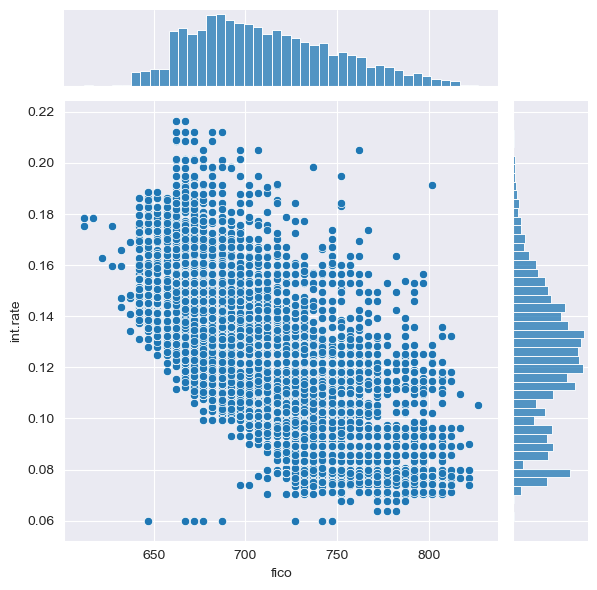

In [6]:
sns.jointplot(x='fico', y='int.rate', data=df)

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

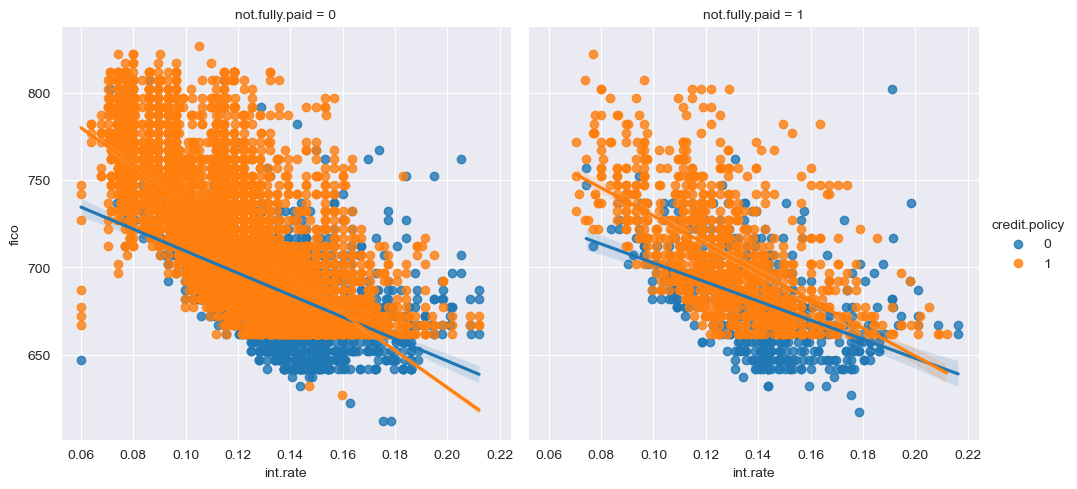

In [7]:
sns.lmplot(x='int.rate', y='fico', hue='credit.policy', col='not.fully.paid', data=df)

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

In [8]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


6. Розбийте датасет на тестві та трейнові дані

In [9]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

In [ ]:
# Дерево рішень
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
# Логістична регресія
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
# Random forest
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(X_train, y_train)
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='error')
xgb_model.fit(X_train, y_train)

9. Використайте ансамбель voting для всіх моделей

In [ ]:
estimators = [('DecisionTreeClassifier', clf), ('LogisticRegression', lr), ('RandomForestClassifier', rfc), ('XGBClassifier', xgb_model)]

voting_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_hard.fit(X_train, y_train)

voting_soft = VotingClassifier(estimators=estimators ,voting='soft')
voting_soft.fit(X_train, y_train)

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

In [12]:
viz = dtreeviz.model(clf, X_train=X, y_train=y, feature_names=X.columns, target_name='loans')
v = viz.view()
v.show()

/Users/alexandra/anaconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


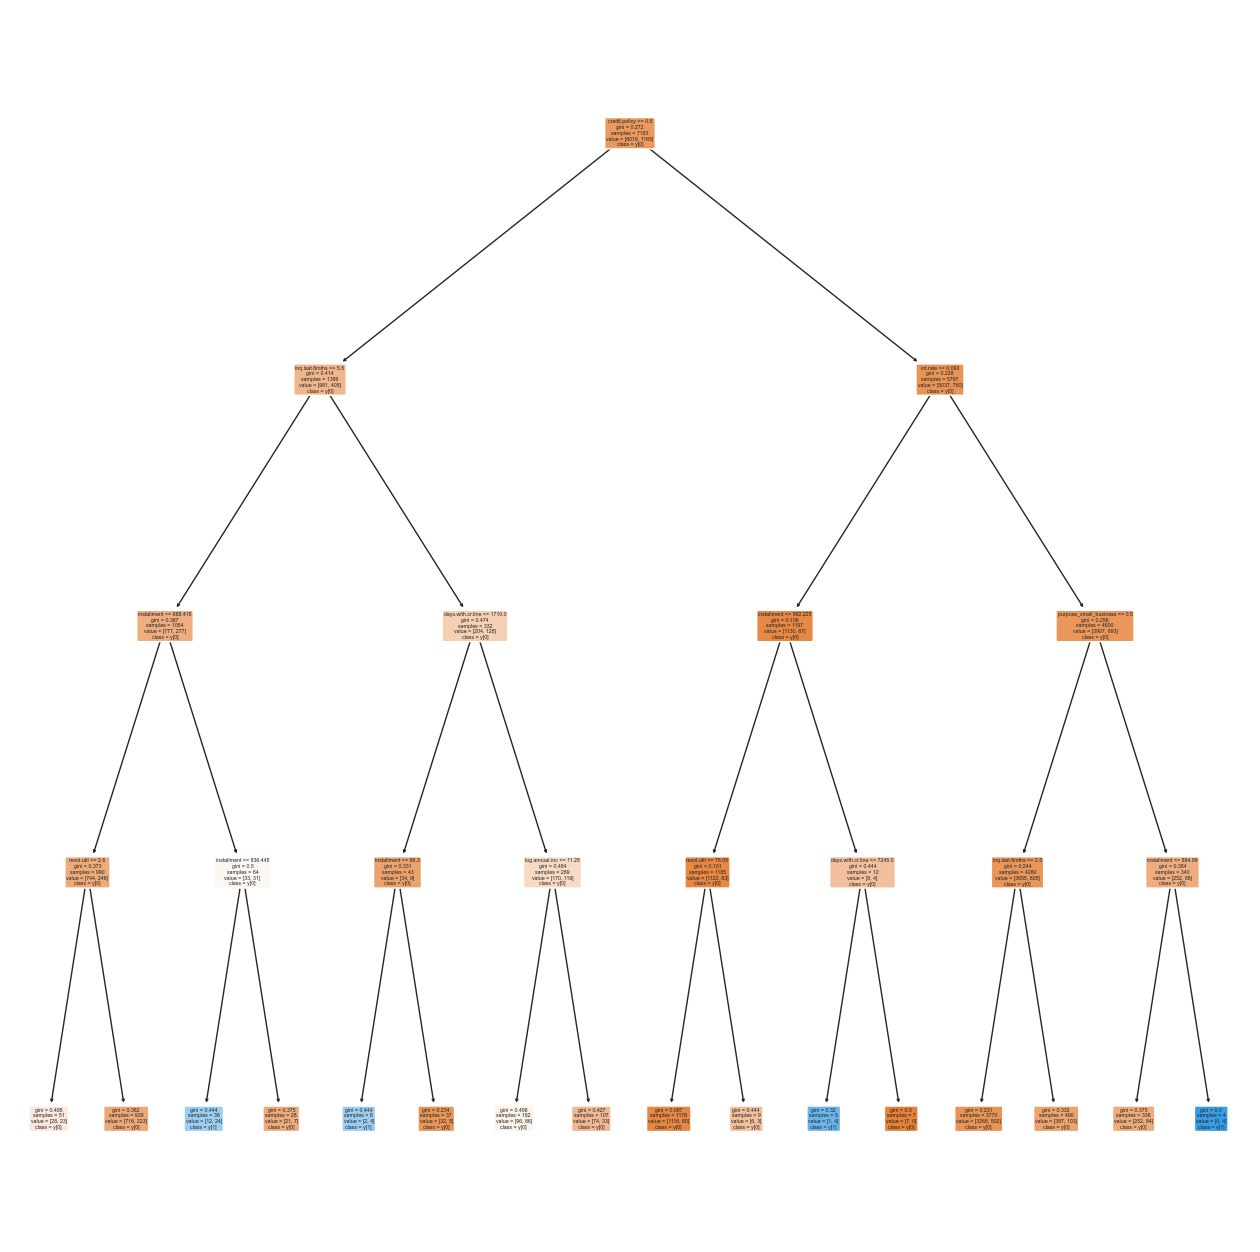

In [13]:
plt.figure(figsize=(16,16))
plot_tree(clf, feature_names=X.columns, filled=True,  rounded=True,  class_names=True)
plt.show()

8. Для кожної з моделей виведіть матрицю, основні метрики
10. Порівняйте результати моделей та зробіть висновки

In [14]:
models = [clf, lr, rfc, xgb_model, voting_hard, voting_soft]

def y_pred(model):
    return model.predict(X_test)

def model_metrix(model):
    if model == voting_hard:
        model_name = 'VotingHard'
    elif model == voting_soft:
        model_name = 'VotingSoft'
    else:
        model_name = model.__class__.__name__
    c_m = confusion_matrix(y_test, y_pred(model))
    TP = c_m[0,0]
    FP = c_m[0,1]
    FN = c_m[1,0]
    TN = c_m[1,1]
    f1 = f1_score(y_test, y_pred(model), average="weighted", zero_division=0)
    precision = precision_score(y_test, y_pred(model), average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred(model), average="weighted", zero_division=0)
    accuracy = accuracy_score(y_test, y_pred(model))

    return {'model_name': model_name,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy}

metrix = []
for model in models:
    metrix.append(model_metrix(model))

metrix_df = pd.DataFrame(metrix)
metrix_df

,model_name,TP,FP,FN,TN,f1_score,precision,recall,accuracy
0,DecisionTreeClassifier,2012,15,366,2,0.774740,0.734162,0.840919,0.840919
1,LogisticRegression,2021,6,365,3,0.777640,0.768094,0.845094,0.845094
2,RandomForestClassifier,2027,0,368,0,0.775913,0.716302,0.846347,0.846347
3,XGBClassifier,1962,65,343,25,0.783410,0.763086,0.829645,0.829645
4,VotingHard,2027,0,368,0,0.775913,0.716302,0.846347,0.846347
5,VotingSoft,2019,8,365,3,0.777211,0.758673,0.844259,0.844259


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [15]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

data = requests.get(url).text

with open('city_data.csv', 'w') as f:
    f.write(data)

city_df = pd.read_csv('city_data.csv')
city_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [17]:
city_df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [18]:
city_df['date.utc'].min()

'2019-05-07 01:00:00+00:00'

In [19]:
city_df['date.utc'].max()

'2019-06-21 00:00:00+00:00'

In [20]:
city_df['weekday'] = pd.to_datetime(city_df['date.utc']).dt.weekday
city_df.groupby(['city', 'weekday'])['value'].mean().reset_index()

,city,weekday,value
0,Antwerpen,0,27.875000
1,Antwerpen,1,22.214286
2,Antwerpen,2,21.125000
3,Antwerpen,3,27.500000
4,Antwerpen,4,28.400000
5,Antwerpen,5,33.500000
6,Antwerpen,6,21.896552
7,London,0,23.969697
8,London,1,24.885714
9,London,2,23.460432


Text(0, 0.5, 'Середнє значення NO2')

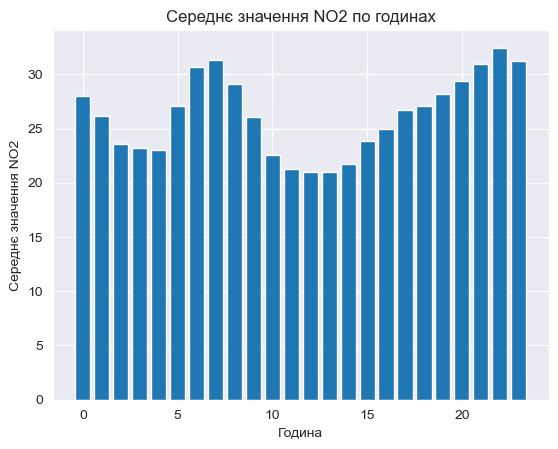

In [21]:
city_df['hour'] = pd.to_datetime(city_df['date.utc']).dt.hour

hourly_avg = city_df.groupby('hour')['value'].mean()
hourly_avg

plt.bar(hourly_avg.index, hourly_avg)
plt.title('Середнє значення NO2 по годинах')
plt.xlabel('Година')
plt.ylabel('Середнє значення NO2')